# Logistic Regression approach

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.linear_model

In [2]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.20035875591149122
[[0.06158414 0.06250964 0.1218186  0.22184945 0.53223816]
 [0.05883507 0.06142381 0.11786625 0.22282801 0.53904687]
 [0.06090144 0.05965329 0.11889054 0.22306092 0.53749381]
 [0.06221977 0.0598063  0.11861392 0.22651284 0.53284717]
 [0.06163321 0.06006477 0.11853017 0.22555989 0.53421196]]


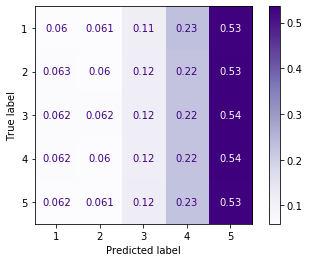

In [3]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

In [4]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, multi_class='N/A', C='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,baseline,full,count,None,N/A,N/A,0.357049,0.20046


In [4]:
classifier = sklearn.linear_model.LogisticRegression(n_jobs=4)
classifier.fit(train_as_vec, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
classifier.score(test_as_vec, test_targets)
common.get_score(classifier, test_as_vec, test_targets)

0.3900367706137717

In [5]:
for sampling in ['random_downsampling']:#, 'full']:# , 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for preprocessing in [None, 'stem']:
            print(f'        preprocessing = {preprocessing}')
            for multi_class in ['ovr', 'multinomial']:
                with open('logistic-reg-tmp.csv', 'w') as f:
                    f.write(results_df.to_csv())
                print(f'            multi_class = {multi_class}')
                for C in [0.01, 0.05, 0.25, 0.5, 1, 5]:
                    print(f'                C = {C}')

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.linear_model.LogisticRegression(C=C, multi_class=multi_class, n_jobs=-1)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'N/A', sampling, representation, 
                                preprocessing, multi_class=multi_class, C=C)])

sampling = random_downsampling
    representation = count
        preprocessing = None
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
        preprocessing = stem
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
            multi_class = multinomial
                C = 0.01
                C = 0.05
                C = 0.25
                C = 0.5
                C = 1
                C = 5
    representation = tf_idf
        preprocessing = None
            multi_class = ovr
                C = 0.01
                C = 0.05
                C = 0.25
              

In [8]:
results_df.sort_values('score', ascending=False)

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,random_downsampling,tf_idf,stem,ovr,0.5,0.588607,0.532721
0,N/A,random_downsampling,tf_idf,None,ovr,0.5,0.588466,0.532484
0,N/A,random_downsampling,tf_idf,None,ovr,0.25,0.588595,0.532249
0,N/A,random_downsampling,tf_idf,stem,ovr,0.25,0.588605,0.531848
0,N/A,random_downsampling,tf_idf,None,multinomial,0.25,0.574850,0.531738
0,N/A,random_downsampling,tf_idf,None,multinomial,0.5,0.579099,0.531544
0,N/A,random_downsampling,tf_idf,stem,multinomial,0.5,0.575774,0.531103
0,N/A,random_downsampling,tf_idf,stem,multinomial,0.25,0.586133,0.531014
0,N/A,random_downsampling,tf_idf,None,ovr,1,0.585777,0.529923
0,N/A,random_downsampling,tf_idf,stem,ovr,1,0.585065,0.529883


In [10]:
results_df.sort_values('real_world_acc', ascending=False)

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,random_downsampling,count,None,ovr,0.01,0.603992,0.519371
0,N/A,random_downsampling,count,stem,ovr,0.01,0.601619,0.520626
0,N/A,random_downsampling,count,stem,ovr,5,0.600314,0.518781
0,N/A,random_downsampling,count,None,ovr,0.5,0.599892,0.518879
0,N/A,random_downsampling,count,None,ovr,5,0.599715,0.518114
0,N/A,random_downsampling,count,stem,ovr,0.25,0.599369,0.518442
0,N/A,random_downsampling,count,None,ovr,0.05,0.599348,0.517052
0,N/A,random_downsampling,count,None,ovr,0.25,0.598582,0.519005
0,N/A,random_downsampling,count,stem,ovr,0.5,0.598542,0.518971
0,N/A,random_downsampling,count,stem,ovr,1,0.598118,0.517546


## Representation <-> multiclass approach comparisons

In [22]:
tf_idf_ovr = results_df[
    (results_df['representation'] == 'tf_idf') &
    (results_df['multi_class'] == 'ovr')].sort_values('score', ascending=False)
tf_idf_ovr

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,random_downsampling,tf_idf,stem,ovr,0.5,0.588607,0.532721
0,N/A,random_downsampling,tf_idf,None,ovr,0.5,0.588466,0.532484
0,N/A,random_downsampling,tf_idf,None,ovr,0.25,0.588595,0.532249
0,N/A,random_downsampling,tf_idf,stem,ovr,0.25,0.588605,0.531848
0,N/A,random_downsampling,tf_idf,None,ovr,1,0.585777,0.529923
0,N/A,random_downsampling,tf_idf,stem,ovr,1,0.585065,0.529883
0,N/A,random_downsampling,tf_idf,None,ovr,0.05,0.575783,0.518189
0,N/A,random_downsampling,tf_idf,stem,ovr,0.05,0.575739,0.517881
0,N/A,random_downsampling,tf_idf,stem,ovr,5,0.570425,0.517168
0,N/A,random_downsampling,tf_idf,None,ovr,5,0.571266,0.517018


In [26]:
tf_idf_multi = results_df[
    (results_df['representation'] == 'tf_idf') &
    (results_df['multi_class'] == 'multinomial')].sort_values('score', ascending=False)
tf_idf_multi

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,random_downsampling,tf_idf,None,multinomial,0.25,0.574850,0.531738
0,N/A,random_downsampling,tf_idf,None,multinomial,0.5,0.579099,0.531544
0,N/A,random_downsampling,tf_idf,stem,multinomial,0.5,0.575774,0.531103
0,N/A,random_downsampling,tf_idf,stem,multinomial,0.25,0.586133,0.531014
0,N/A,random_downsampling,tf_idf,None,multinomial,1,0.576365,0.529501
0,N/A,random_downsampling,tf_idf,stem,multinomial,1,0.577805,0.529316
0,N/A,random_downsampling,tf_idf,None,multinomial,5,0.570413,0.527615
0,N/A,random_downsampling,tf_idf,stem,multinomial,5,0.563238,0.527097
0,N/A,random_downsampling,tf_idf,None,multinomial,0.05,0.571103,0.521537
0,N/A,random_downsampling,tf_idf,stem,multinomial,0.05,0.571301,0.521431


In [28]:
count_ovr = results_df[
    (results_df['representation'] == 'count') &
    (results_df['multi_class'] == 'ovr')].sort_values('score', ascending=False)
count_ovr

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,random_downsampling,count,stem,ovr,0.01,0.601619,0.520626
0,N/A,random_downsampling,count,None,ovr,0.01,0.603992,0.519371
0,N/A,random_downsampling,count,None,ovr,0.25,0.598582,0.519005
0,N/A,random_downsampling,count,stem,ovr,0.5,0.598542,0.518971
0,N/A,random_downsampling,count,None,ovr,0.5,0.599892,0.518879
0,N/A,random_downsampling,count,stem,ovr,5,0.600314,0.518781
0,N/A,random_downsampling,count,stem,ovr,0.25,0.599369,0.518442
0,N/A,random_downsampling,count,stem,ovr,0.05,0.597637,0.518378
0,N/A,random_downsampling,count,None,ovr,5,0.599715,0.518114
0,N/A,random_downsampling,count,stem,ovr,1,0.598118,0.517546


In [30]:
count_multi = results_df[
    (results_df['representation'] == 'count') &
    (results_df['multi_class'] == 'ovr')].sort_values('score', ascending=False)
count_multi

,classifier_type,sampling,representation,preprocessing,multi_class,C,real_world_acc,score
0,N/A,random_downsampling,count,stem,ovr,0.01,0.601619,0.520626
0,N/A,random_downsampling,count,None,ovr,0.01,0.603992,0.519371
0,N/A,random_downsampling,count,None,ovr,0.25,0.598582,0.519005
0,N/A,random_downsampling,count,stem,ovr,0.5,0.598542,0.518971
0,N/A,random_downsampling,count,None,ovr,0.5,0.599892,0.518879
0,N/A,random_downsampling,count,stem,ovr,5,0.600314,0.518781
0,N/A,random_downsampling,count,stem,ovr,0.25,0.599369,0.518442
0,N/A,random_downsampling,count,stem,ovr,0.05,0.597637,0.518378
0,N/A,random_downsampling,count,None,ovr,5,0.599715,0.518114
0,N/A,random_downsampling,count,stem,ovr,1,0.598118,0.517546


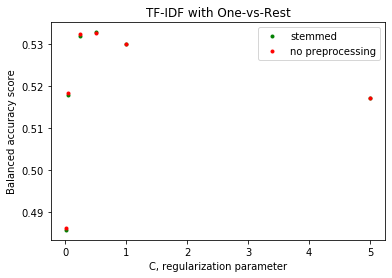

In [47]:
stemmed_X = tf_idf_ovr[tf_idf_ovr['preprocessing'] == 'stem']['C'].values
stemmed_Y = tf_idf_ovr[tf_idf_ovr['preprocessing'] == 'stem']['score'].values

dirty_X = tf_idf_ovr[tf_idf_ovr['preprocessing'] != 'stem']['C'].values
dirty_Y = tf_idf_ovr[tf_idf_ovr['preprocessing'] != 'stem']['score'].values

plt.plot(stemmed_X, stemmed_Y, color='green', linestyle='', marker='.', label='stemmed')
plt.plot(dirty_X, dirty_Y, color='red', linestyle='', marker='.', label='no preprocessing')

plt.xlabel('C, regularization parameter')
plt.ylabel('Balanced accuracy score')
plt.title('TF-IDF with One-vs-Rest')
plt.legend()

Text(0.5, 1.0, 'TF-IDF with Multinomial')

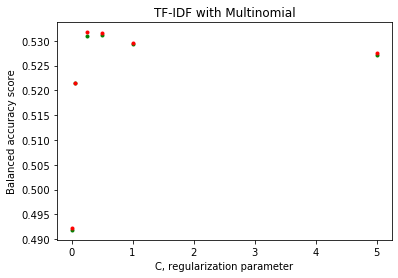

In [44]:
stemmed_X = tf_idf_multi[tf_idf_multi['preprocessing'] == 'stem']['C'].values
stemmed_Y = tf_idf_multi[tf_idf_multi['preprocessing'] == 'stem']['score'].values

dirty_X = tf_idf_multi[tf_idf_multi['preprocessing'] != 'stem']['C'].values
dirty_Y = tf_idf_multi[tf_idf_multi['preprocessing'] != 'stem']['score'].values

plt.plot(stemmed_X, stemmed_Y, color='green', linestyle='', marker='.')
plt.plot(dirty_X, dirty_Y, color='red', linestyle='', marker='.')

plt.xlabel('C, regularization parameter')
plt.ylabel('Balanced accuracy score')
plt.title('TF-IDF with Multinomial')

## Winners!

In [49]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
    'random_downsampling', 'tf_idf', 'stem')

classifier = sklearn.linear_model.LogisticRegression(C=0.5, multi_class='ovr', n_jobs=-1)
classifier.fit(train_as_vec, train_targets)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

SCORE: 0.532720912425771
[[0.70144995 0.17765695 0.0538331  0.02475706 0.04230295]
 [0.27511277 0.40607962 0.2090606  0.06271818 0.04702883]
 [0.0838633  0.18092125 0.41737494 0.22716196 0.09067855]
 [0.03812664 0.04704193 0.18975938 0.44201941 0.28305263]
 [0.03445716 0.01750913 0.04939493 0.20195812 0.69668064]]


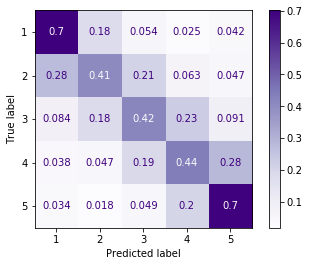

In [53]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)

In [54]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
    'random_downsampling', 'count', None)

classifier = sklearn.linear_model.LogisticRegression(C=0.01, multi_class='ovr', n_jobs=-1)
classifier.fit(train_as_vec, train_targets)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
classifier.score(test_as_vec, test_targets)

0.603992289710817

SCORE: 0.5193708676768637
[[0.71448404 0.13134351 0.05996452 0.02437143 0.0698365 ]
 [0.31151206 0.33477152 0.21784664 0.06267896 0.07319082]
 [0.09309559 0.15334324 0.410421   0.20697375 0.13616642]
 [0.03860518 0.04095623 0.18323676 0.37517035 0.36203148]
 [0.03240714 0.01389509 0.04757024 0.1441201  0.76200743]]


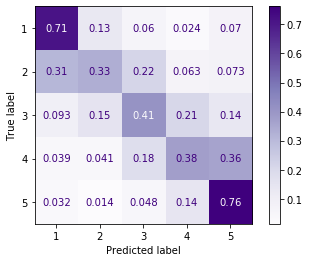

In [60]:
common.display_classifier_performance(classifier, test_as_vec, test_targets)